In [4]:
%pip install pandas matplotlib seaborn nltk textblob wordcloud

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install langdetect

Note: you may need to restart the kernel to use updated packages.


In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import re
import langdetect
# Download NLTK data (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
from textblob import TextBlob
from wordcloud import WordCloud

In [13]:
data = pd.read_csv('/kaggle/input/translated-and-cleaned-tweets/Translated.csv')

data

In [14]:
stop_words = set(stopwords.words('english'))

def extract_keywords(text, top_n=10):
    words = word_tokenize(str(text).lower())
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
    word_counts = Counter(filtered_words)
    return word_counts.most_common(top_n)

top_keywords_translated = extract_keywords(' '.join(data['Translated'].dropna()), top_n=20)

print("Top Keywords in Translated Content:", top_keywords_translated)

Top Keywords in Translated Content: [('https', 591), ('war', 308), ('putin', 253), ('ukraine', 216), ('russian', 107), ('russia', 101), ('republic', 95), ('moscow', 85), ('weapons', 81), ('ukrainian', 68), ('conflict', 60), ('zelensky', 59), ('kiev', 52), ('mariupol', 52), ('civilians', 51), ('photo', 46), ('peace', 43), ('moldova', 43), ('march', 39), ('people', 37)]


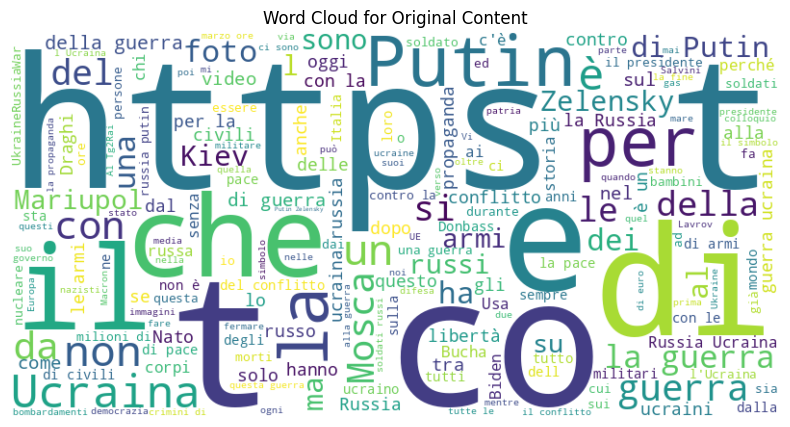

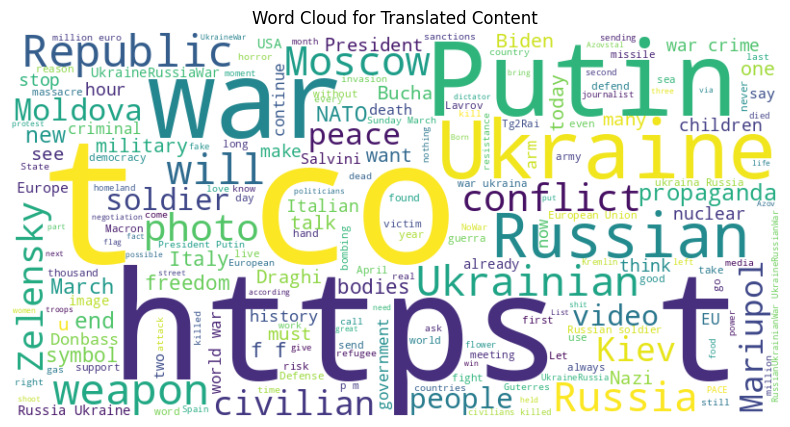

In [15]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

plot_wordcloud(' '.join(data['Content'].dropna()), "Word Cloud for Original Content")
plot_wordcloud(' '.join(data['Translated'].dropna()), "Word Cloud for Translated Content")

In [16]:
filtered_data = data

In [17]:
filtered_data

,Unnamed: 0.1,Unnamed: 0,ID,URL,Type,Label,Content,Image_Name,Translated
0,0,0,1498022438398877704,https://twitter.com/manuela_carloni/status/149...,tweet,1,Dopo aver hackerato la tv di Stato sostituendo...,1498022438398877704.jpg,After hacking the state TV replacing propagand...
1,2,2,1497887473862467584,https://twitter.com/barbarameletto/status/1497...,tweet,2,#flowers #lovers\nFate l'amore non fate la gue...,1497887473862467584.jpg,#flowers #lovers Make love don't make war. Mar...
2,3,3,1497838543619645441,https://twitter.com/_dani_ta_6/status/14978385...,tweet,2,Se solo tutti mostrassimo più amore e comprens...,1497838543619645441.jpg,If only we all showed more love and understand...
3,4,4,1497639979534667783,https://twitter.com/GabrieleGranato/status/149...,tweet,2,Chi sono i soldati che vediamo nei video? Sono...,1497639979534667783.jpg,Who are the soldiers we see in the videos? Are...
4,5,5,1497624763396546561,https://twitter.com/nonleggerlo/status/1497624...,tweet,1,Non credevo che #Salvini potesse peggiorare la...,1497624763396546561.jpg,I didn't think that #Salvini could make his ow...
...,...,...,...,...,...,...,...,...,...
475,718,718,1538486694701408256,https://twitter.com/fratotolo2/status/15384866...,tweet,1,Se scrivo che la signora #Zelensky sarebbe sta...,1538486694701408256.jpg,If I write that Mrs. #Zelensky would be spotte...
476,721,721,1538254178413322241,https://twitter.com/104Pierpa/status/153825417...,tweet,0,#Zelensky e sua moglie #OlenaZelenska hanno ac...,1538254178413322241.jpg,#Zelensky and his wife #OlenaZelenska bought a...
477,722,722,1537840889749458946,https://twitter.com/PartitComunista/status/153...,tweet,2,TUTTI UNITI CONTRO DRAGHI\nCONTRO LA GUERRA\nC...,1537840889749458946.jpg,ALL UNITED STATES AGAINST THE WAR AGAINST THE ...
478,726,726,1535923240710946816,https://twitter.com/PartitComunista/status/153...,tweet,2,TUTTI UNITI CONTRO DRAGHI\nCONTRO LA GUERRA\nC...,1535923240710946816.jpg,ALL UNITED STATES AGAINST THE WAR AGAINST THE ...


In [18]:
def clean_text(text):
    if isinstance(text, str):
        # Remove URLs
        text = re.sub(r"https\S+", "", text)
        # Convert to lowercase
        text = text.lower()
        return text
    return ""
filtered_data['Cleaned_Translated'] = filtered_data['Translated'].apply(clean_text)

In [19]:
filtered_data


,Unnamed: 0.1,Unnamed: 0,ID,URL,Type,Label,Content,Image_Name,Translated,Cleaned_Translated
0,0,0,1498022438398877704,https://twitter.com/manuela_carloni/status/149...,tweet,1,Dopo aver hackerato la tv di Stato sostituendo...,1498022438398877704.jpg,After hacking the state TV replacing propagand...,after hacking the state tv replacing propagand...
1,2,2,1497887473862467584,https://twitter.com/barbarameletto/status/1497...,tweet,2,#flowers #lovers\nFate l'amore non fate la gue...,1497887473862467584.jpg,#flowers #lovers Make love don't make war. Mar...,#flowers #lovers make love don't make war. mar...
2,3,3,1497838543619645441,https://twitter.com/_dani_ta_6/status/14978385...,tweet,2,Se solo tutti mostrassimo più amore e comprens...,1497838543619645441.jpg,If only we all showed more love and understand...,if only we all showed more love and understand...
3,4,4,1497639979534667783,https://twitter.com/GabrieleGranato/status/149...,tweet,2,Chi sono i soldati che vediamo nei video? Sono...,1497639979534667783.jpg,Who are the soldiers we see in the videos? Are...,who are the soldiers we see in the videos? are...
4,5,5,1497624763396546561,https://twitter.com/nonleggerlo/status/1497624...,tweet,1,Non credevo che #Salvini potesse peggiorare la...,1497624763396546561.jpg,I didn't think that #Salvini could make his ow...,i didn't think that #salvini could make his ow...
...,...,...,...,...,...,...,...,...,...,...
475,718,718,1538486694701408256,https://twitter.com/fratotolo2/status/15384866...,tweet,1,Se scrivo che la signora #Zelensky sarebbe sta...,1538486694701408256.jpg,If I write that Mrs. #Zelensky would be spotte...,if i write that mrs. #zelensky would be spotte...
476,721,721,1538254178413322241,https://twitter.com/104Pierpa/status/153825417...,tweet,0,#Zelensky e sua moglie #OlenaZelenska hanno ac...,1538254178413322241.jpg,#Zelensky and his wife #OlenaZelenska bought a...,#zelensky and his wife #olenazelenska bought a...
477,722,722,1537840889749458946,https://twitter.com/PartitComunista/status/153...,tweet,2,TUTTI UNITI CONTRO DRAGHI\nCONTRO LA GUERRA\nC...,1537840889749458946.jpg,ALL UNITED STATES AGAINST THE WAR AGAINST THE ...,all united states against the war against the ...
478,726,726,1535923240710946816,https://twitter.com/PartitComunista/status/153...,tweet,2,TUTTI UNITI CONTRO DRAGHI\nCONTRO LA GUERRA\nC...,1535923240710946816.jpg,ALL UNITED STATES AGAINST THE WAR AGAINST THE ...,all united states against the war against the ...


In [20]:
filtered_data.to_csv('Cleaned_Translated_Final.csv')

# Embeddings

In [21]:
import pandas as pd
import numpy as np
import nltk
import spacy
import gensim
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from collections import defaultdict

# Load dataset
data = pd.read_csv("/kaggle/working/Cleaned_Translated_Final.csv")

# Extract relevant columns
texts = data["Cleaned_Translated"].astype(str).tolist()
labels = data["Label"].tolist()

# Tokenize sentences
tokenized_texts = [word_tokenize(text.lower()) for text in texts]

# Train Word2Vec Model
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Load GloVe embeddings (Pre-trained)
glove_path = "/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.200d.txt"
glove_embeddings = {}
with open(glove_path, "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        glove_embeddings[word] = vector

# Function to compute sentence embeddings (average of word embeddings)
def sentence_embedding(sentence, model, use_glove=False):
    words = word_tokenize(sentence.lower())
    word_vectors = []
    for word in words:
        if use_glove:
            vector = glove_embeddings.get(word)
        else:
            vector = model.wv[word] if word in model.wv else None
        if vector is not None:
            word_vectors.append(vector)
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(100)

# Compute embeddings
X_word2vec = np.array([sentence_embedding(sent, word2vec_model) for sent in texts])
X_glove = np.array([sentence_embedding(sent, None, use_glove=True) for sent in texts])
y = np.array(labels)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_word2vec, y, test_size=0.2, random_state=42)

In [ ]:
# Train SVM Classifier
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

In [ ]:
# Identify misclassified instances
misclassified = np.where(y_pred != y_test)[0]

# Analyze most misclassified class
misclass_counts = defaultdict(int)
for i in misclassified:
    misclass_counts[y_test[i]] += 1

most_misclassified_class = max(misclass_counts, key=misclass_counts.get)
print(f"Most misclassified class: {most_misclassified_class}")

# Extract sample misclassified sentence
misclassified_sentences = [texts[i] for i in misclassified if y_test[i] == most_misclassified_class]
sample_sentence = misclassified_sentences[0]
print(f"Sample misclassified sentence: {sample_sentence}")

In [ ]:
# Perform POS Tagging & Parse Tree Analysis
nlp = spacy.load("en_core_web_sm")
parsed_sentence = nlp(sample_sentence)

# POS Tags
pos_tags = [(token.text, token.pos_) for token in parsed_sentence]
print("POS Tags:", pos_tags)

# Dependency Parsing
for token in parsed_sentence:
    print(f"{token.text} -> {token.dep_} -> {token.head.text}")

# Conclusion and Fix
"""
- If words like 'not' or 'never' are not well represented in embeddings, they might mislead classification.
- If proper nouns are affecting classification, adding entity recognition (NER) can help.
- Manually improve embeddings by ensuring critical words have distinct vector representations.
"""

glove

In [ ]:
X_glove = np.array([sentence_embedding(sent, None, use_glove=True) for sent in texts])
y = np.array(labels)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_glove, y, test_size=0.2, random_state=42)

In [ ]:
# Train SVM Classifier
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

In [ ]:
# Identify misclassified instances
misclassified = np.where(y_pred != y_test)[0]

# Analyze most misclassified class
misclass_counts = defaultdict(int)
for i in misclassified:
    misclass_counts[y_test[i]] += 1

most_misclassified_class = max(misclass_counts, key=misclass_counts.get)
print(f"Most misclassified class: {most_misclassified_class}")

# Extract sample misclassified sentence
misclassified_sentences = [texts[i] for i in misclassified if y_test[i] == most_misclassified_class]
sample_sentence = misclassified_sentences[0]
print(f"Sample misclassified sentence: {sample_sentence}")

In [ ]:
# Perform POS Tagging & Parse Tree Analysis
nlp = spacy.load("en_core_web_sm")
parsed_sentence = nlp(sample_sentence)

# POS Tags
pos_tags = [(token.text, token.pos_) for token in parsed_sentence]
print("POS Tags:", pos_tags)

# Dependency Parsing
for token in parsed_sentence:
    print(f"{token.text} -> {token.dep_} -> {token.head.text}")


In [ ]:
import numpy as np
from collections import defaultdict
from sklearn.metrics import classification_report

# Function to compute misclassification stats
def analyze_misclassifications(y_true, y_pred, texts, model_name):
    misclassified = np.where(y_pred != y_true)[0]

    # Count total misclassifications per class
    misclass_counts = defaultdict(int)
    for i in misclassified:
        misclass_counts[y_true[i]] += 1

    print(f"\n### {model_name} Misclassification Summary ###")
    print(f"Total Misclassified Samples: {len(misclassified)}")
    print("Misclassification Counts Per Class:")
    for label, count in misclass_counts.items():
        print(f" - Class {label}: {count}")

    # Sample misclassified sentences
    print("\nSample Misclassified Sentences:")
    for i in misclassified[:5]:  # Display first 5 misclassified samples
        print(f"Actual: {y_true[i]}, Predicted: {y_pred[i]}, Sentence: {texts[i]}")

    return misclassified

# Train/Test Split for Word2Vec
X_train_w2v, X_test_w2v, y_train, y_test = train_test_split(X_word2vec, y, test_size=0.2, random_state=42)

# Train SVM on Word2Vec
svm_w2v = SVC(kernel="linear")
svm_w2v.fit(X_train_w2v, y_train)
y_pred_w2v = svm_w2v.predict(X_test_w2v)

# Analyze misclassifications for Word2Vec
misclassified_w2v = analyze_misclassifications(y_test, y_pred_w2v, texts, "Word2Vec")

# Train/Test Split for GloVe
X_train_glove, X_test_glove, _, _ = train_test_split(X_glove, y, test_size=0.2, random_state=42)

# Train SVM on GloVe
svm_glove = SVC(kernel="linear")
svm_glove.fit(X_train_glove, y_train)
y_pred_glove = svm_glove.predict(X_test_glove)

# Analyze misclassifications for GloVe
misclassified_glove = analyze_misclassifications(y_test, y_pred_glove, texts, "GloVe")

# Compare Word2Vec vs. GloVe misclassified sentences
common_misclassified = set(misclassified_w2v) & set(misclassified_glove)
print(f"\nCommon misclassified samples in both embeddings: {len(common_misclassified)}")

# Display classification report
print("\n### Word2Vec Classification Report ###")
print(classification_report(y_test, y_pred_w2v))

print("\n### GloVe Classification Report ###")
print(classification_report(y_test, y_pred_glove))


In [ ]:
data['Label'].value_counts()


In [ ]:
# Find the indices of misclassified samples for both models
common_misclassified = set(misclassified_w2v) & set(misclassified_glove)

# Print common misclassified samples with their actual label and predictions
print(f"\n### Common Misclassified Samples in Both Models: {len(common_misclassified)} ###\n")

for i in common_misclassified:
    print(f"Sentence: {texts[i]}")
    print(f"  → Actual Label: {y_test[i]}")
    print(f"  → Word2Vec Prediction: {y_pred_w2v[i]}")
    print(f"  → GloVe Prediction: {y_pred_glove[i]}")
    print("-" * 80)

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

# Assuming texts is a list of sentences/documents
tagged_data = [TaggedDocument(words=word_tokenize(doc.lower()), tags=[str(i)]) for i, doc in enumerate(texts)]

# Train Doc2Vec model
model_doc2vec = Doc2Vec(vector_size=100, window=5, min_count=2, workers=4, epochs=20)
model_doc2vec.build_vocab(tagged_data)
model_doc2vec.train(tagged_data, total_examples=model_doc2vec.corpus_count, epochs=model_doc2vec.epochs)

# Generate embeddings for each document
X_doc2vec = np.array([model_doc2vec.infer_vector(word_tokenize(doc.lower())) for doc in texts])


In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert text to a document-term matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_counts = vectorizer.fit_transform(texts)

# Train LDA model
lda = LatentDirichletAllocation(n_components=10, max_iter=10, learning_method='online', random_state=42)
X_lda = lda.fit_transform(X_counts)


In [34]:
import numpy as np
from collections import defaultdict
from sklearn.metrics import classification_report
from gensim.models.doc2vec import Doc2Vec
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Function to compute misclassification stats
def analyze_misclassifications(y_true, y_pred, texts, model_name):
    misclassified = np.where(y_pred != y_true)[0]

    misclass_counts = defaultdict(int)
    for i in misclassified:
        misclass_counts[y_true[i]] += 1

    print(f"\n### {model_name} Misclassification Summary ###")
    print(f"Total Misclassified Samples: {len(misclassified)}")
    print("Misclassification Counts Per Class:")
    for label, count in misclass_counts.items():
        print(f" - Class {label}: {count}")

    print("\nSample Misclassified Sentences:")
    for i in misclassified[:5]:
        print(f"Actual: {y_true[i]}, Predicted: {y_pred[i]}, Sentence: {texts[i]}")

    return misclassified


# --- DOC2VEC ---
# Assume X_doc2vec is a matrix of document embeddings generated by a trained Doc2Vec model
X_train_doc2vec, X_test_doc2vec, y_train, y_test = train_test_split(X_doc2vec, y, test_size=0.2, random_state=42)

svm_doc2vec = SVC(kernel="linear")
svm_doc2vec.fit(X_train_doc2vec, y_train)
y_pred_doc2vec = svm_doc2vec.predict(X_test_doc2vec)

misclassified_doc2vec = analyze_misclassifications(y_test, y_pred_doc2vec, texts, "Doc2Vec")

# --- LDA ---
# Assume X_lda is a topic distribution matrix generated by an LDA model
X_train_lda, X_test_lda, _, _ = train_test_split(X_lda, y, test_size=0.2, random_state=42)

svm_lda = SVC(kernel="linear")
svm_lda.fit(X_train_lda, y_train)
y_pred_lda = svm_lda.predict(X_test_lda)

misclassified_lda = analyze_misclassifications(y_test, y_pred_lda, texts, "LDA")

# Compare Doc2Vec vs. LDA misclassified sentences
common_misclassified = set(misclassified_doc2vec) & set(misclassified_lda)
print(f"\nCommon misclassified samples in both Doc2Vec and LDA: {len(common_misclassified)}")

# Display classification reports
print("\n### Doc2Vec Classification Report ###")
print(classification_report(y_test, y_pred_doc2vec))

print("\n### LDA Classification Report ###")
print(classification_report(y_test, y_pred_lda))



### Doc2Vec Misclassification Summary ###
Total Misclassified Samples: 53
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 20
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1, Predicted: 2, Sentence: if only we all showed more love and understanding maybe we wouldn't need to fight wars with bombs and weapons.as far as we can spend a good sunday, all our thoughts are addressed to the ukrainian people. • #pace #nowar #goodmorning #canyaman 
Actual: 3, Predicted: 2, Sentence: war in ukraine: battle in the streets of kiev. zelensky's appeal: "let's defend the capital, weapons come in."  "direct, video and photos #ukraina #russian #war #kiev #deaths #wounded #ukraina-r

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [35]:

# Compare Word2Vec vs. GloVe misclassified sentences
common_misclassified = set(misclassified_lda) & set(misclassified_doc2vec)
print(f"\nCommon misclassified samples in both embeddings: {len(common_misclassified)}")



Common misclassified samples in both embeddings: 52


In [36]:
for i in common_misclassified:
    print(f"Sentence: {texts[i]}")
    print(f"  → Actual Label: {y_test[i]}")
    print(f"  → Word2Vec Prediction: {y_pred_w2v[i]}")
    print(f"  → GloVe Prediction: {y_pred_glove[i]}")
    print("-" * 80)

Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
  → Actual Label: 3
  → Word2Vec Prediction: 2
  → GloVe Prediction: 2
--------------------------------------------------------------------------------
Sentence: if only we all showed more love and understanding maybe we wouldn't need to fight wars with bombs and weapons.as far as we can spend a good sunday, all our thoughts are addressed to the ukrainian people. • #pace #nowar #goodmorning #canyaman 
  → Actual Label: 1
  → Word2Vec Prediction: 2
  → GloVe Prediction: 1
--------------------------------------------------------------------------------
Sentence: war in ukraine: battle in the streets of kiev. zelensky's appeal: "let's defend the capital, weapons come in."  "direct, video and photos #ukraina #russia

In [37]:
# Compare Word2Vec vs. GloVe misclassified sentences
common_misclassified = set(misclassified_lda) & set(misclassified_doc2vec) & set(misclassified_w2v) & set(misclassified_glove)
print(f"\nCommon misclassified samples in both embeddings: {len(common_misclassified)}")



Common misclassified samples in both embeddings: 38


In [38]:
for i in common_misclassified:
    print(f"Sentence: {texts[i]}")
    print(f"  → Actual Label: {y_test[i]}")
    print(f"  → Word2Vec Prediction: {y_pred_w2v[i]}")
    print(f"  → GloVe Prediction: {y_pred_glove[i]}")
    print("-" * 80)

Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
  → Actual Label: 3
  → Word2Vec Prediction: 2
  → GloVe Prediction: 2
--------------------------------------------------------------------------------
Sentence: fourth. at the beginning of this week, thousands of social media users falsely claimed that this video showed the war between russia and ukraine, but it is a video of the video game "weapon 3"  always channel rossella fidanza 
  → Actual Label: 1
  → Word2Vec Prediction: 2
  → GloVe Prediction: 0
--------------------------------------------------------------------------------
Sentence: place of birth: (a), (b), (c), (d), (d), (e), (f), (f), (f), (f), (f), (f), (f), (f), (f), (f), (f), (f), (f), (f), (f), (f), (f), (f), (f), (f), (f), (f), (f), (f), (f),

In [39]:
from gensim.models import Word2Vec
from sklearn.metrics import classification_report
from collections import defaultdict
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize

# Function to train Word2Vec with different context sizes
def train_word2vec_with_context(texts, context_size):
    tokenized_texts = [word_tokenize(doc.lower()) for doc in texts]
    model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=context_size, min_count=2, workers=4, sg=1)
    embeddings = np.array([np.mean([model.wv[word] for word in doc if word in model.wv] or [np.zeros(100)], axis=0) for doc in tokenized_texts])
    return embeddings

# Function to analyze misclassifications
def analyze_misclassifications(y_true, y_pred, texts, context_size):
    misclassified = np.where(y_pred != y_true)[0]
    misclass_counts = defaultdict(int)
    for i in misclassified:
        misclass_counts[y_true[i]] += 1

    print(f"\n### Word2Vec with Context Size {context_size} Misclassification Summary ###")
    print(f"Total Misclassified Samples: {len(misclassified)}")
    print("Misclassification Counts Per Class:")
    for label, count in misclass_counts.items():
        print(f" - Class {label}: {count}")

    print("\nSample Misclassified Sentences:")
    for i in misclassified[:5]:  # Display first 5 misclassified samples
        print(f"Actual: {y_true[i]}, Predicted: {y_pred[i]}, Sentence: {texts[i]}")

# List of context sizes to experiment with
context_sizes = [ 3, 5, 10, 20]

for size in context_sizes:
    X_w2v = train_word2vec_with_context(texts, size)
    X_train, X_test, y_train, y_test = train_test_split(X_w2v, y, test_size=0.2, random_state=42)
    svm = SVC(kernel="linear")
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    # Generate classification report
    print(f"\n### Word2Vec with Context Size {size} ###")
    print(classification_report(y_test, y_pred))

    # Analyze misclassifications
    analyze_misclassifications(y_test, y_pred, texts, size)



### Word2Vec with Context Size 3 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.45      1.00      0.62        43
           3       0.00      0.00      0.00        17

    accuracy                           0.45        96
   macro avg       0.11      0.25      0.15        96
weighted avg       0.20      0.45      0.28        96


### Word2Vec with Context Size 3 Misclassification Summary ###
Total Misclassified Samples: 53
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 20
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1, Pr

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### Word2Vec with Context Size 5 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.45      1.00      0.62        43
           3       0.00      0.00      0.00        17

    accuracy                           0.45        96
   macro avg       0.11      0.25      0.15        96
weighted avg       0.20      0.45      0.28        96


### Word2Vec with Context Size 5 Misclassification Summary ###
Total Misclassified Samples: 53
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 20
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1, Pr

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### Word2Vec with Context Size 10 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.45      1.00      0.62        43
           3       0.00      0.00      0.00        17

    accuracy                           0.45        96
   macro avg       0.11      0.25      0.15        96
weighted avg       0.20      0.45      0.28        96


### Word2Vec with Context Size 10 Misclassification Summary ###
Total Misclassified Samples: 53
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 20
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1, 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### Word2Vec with Context Size 20 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.45      1.00      0.62        43
           3       0.00      0.00      0.00        17

    accuracy                           0.45        96
   macro avg       0.11      0.25      0.15        96
weighted avg       0.20      0.45      0.28        96


### Word2Vec with Context Size 20 Misclassification Summary ###
Total Misclassified Samples: 53
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 20
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1, 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
from gensim.models import Word2Vec, Doc2Vec, LdaModel
from sklearn.metrics import classification_report
from collections import defaultdict
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Function to train Word2Vec with different context sizes
def train_word2vec_with_context(texts, context_size):
    tokenized_texts = [word_tokenize(doc.lower()) for doc in texts]
    model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=context_size, min_count=2, workers=4, sg=1)
    embeddings = np.array([np.mean([model.wv[word] for word in doc if word in model.wv] or [np.zeros(100)], axis=0) for doc in tokenized_texts])
    return embeddings

# Function to train Doc2Vec with different context sizes
def train_doc2vec_with_context(texts, context_size):
    tokenized_texts = [word_tokenize(doc.lower()) for doc in texts]
    tagged_data = [gensim.models.doc2vec.TaggedDocument(words=doc, tags=[i]) for i, doc in enumerate(tokenized_texts)]
    model = Doc2Vec(vector_size=100, window=context_size, min_count=2, workers=4)
    model.build_vocab(tagged_data)
    model.train(tagged_data, total_examples=model.corpus_count, epochs=20)
    embeddings = np.array([model.dv[i] for i in range(len(texts))])
    return embeddings

# Function to train LDA and get embeddings for classification
def train_lda(texts, num_topics=10):
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(texts)
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(X)
    embeddings = lda.transform(X)
    return embeddings

# Function to analyze misclassifications
def analyze_misclassifications(y_true, y_pred, texts, context_size, model_name):
    misclassified = np.where(y_pred != y_true)[0]
    misclass_counts = defaultdict(int)
    for i in misclassified:
        misclass_counts[y_true[i]] += 1

    print(f"\n### {model_name} with Context Size {context_size} Misclassification Summary ###")
    print(f"Total Misclassified Samples: {len(misclassified)}")
    print("Misclassification Counts Per Class:")
    for label, count in misclass_counts.items():
        print(f" - Class {label}: {count}")

    print("\nSample Misclassified Sentences:")
    for i in misclassified[:5]:  # Display first 5 misclassified samples
        print(f"Actual: {y_true[i]}, Predicted: {y_pred[i]}, Sentence: {texts[i]}")

# List of context sizes to experiment with
[ 3, 5, 10, 20]
model_names = ['Word2Vec', 'Doc2Vec', 'LDA']

for model_name in model_names:
    for size in context_sizes:
        if model_name == 'Word2Vec':
            X_embeddings = train_word2vec_with_context(texts, size)
        elif model_name == 'Doc2Vec':
            X_embeddings = train_doc2vec_with_context(texts, size)
        elif model_name == 'LDA':
            X_embeddings = train_lda(texts, num_topics=10)
        
        X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y, test_size=0.2, random_state=42)
        svm = SVC(kernel="linear")
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)

        # Generate classification report
        print(f"\n### {model_name} with Context Size {size} ###")
        print(classification_report(y_test, y_pred))

        # Analyze misclassifications
        analyze_misclassifications(y_test, y_pred, texts, size, model_name)



### Word2Vec with Context Size 3 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.45      1.00      0.62        43
           3       0.00      0.00      0.00        17

    accuracy                           0.45        96
   macro avg       0.11      0.25      0.15        96
weighted avg       0.20      0.45      0.28        96


### Word2Vec with Context Size 3 Misclassification Summary ###
Total Misclassified Samples: 53
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 20
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1, Pr

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### Word2Vec with Context Size 5 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.45      1.00      0.62        43
           3       0.00      0.00      0.00        17

    accuracy                           0.45        96
   macro avg       0.11      0.25      0.15        96
weighted avg       0.20      0.45      0.28        96


### Word2Vec with Context Size 5 Misclassification Summary ###
Total Misclassified Samples: 53
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 20
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1, Pr

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### Word2Vec with Context Size 10 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.45      1.00      0.62        43
           3       0.00      0.00      0.00        17

    accuracy                           0.45        96
   macro avg       0.11      0.25      0.15        96
weighted avg       0.20      0.45      0.28        96


### Word2Vec with Context Size 10 Misclassification Summary ###
Total Misclassified Samples: 53
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 20
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1, 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### Word2Vec with Context Size 20 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.45      1.00      0.62        43
           3       0.00      0.00      0.00        17

    accuracy                           0.45        96
   macro avg       0.11      0.25      0.15        96
weighted avg       0.20      0.45      0.28        96


### Word2Vec with Context Size 20 Misclassification Summary ###
Total Misclassified Samples: 53
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 20
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1, 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### Doc2Vec with Context Size 3 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.45      1.00      0.62        43
           3       0.00      0.00      0.00        17

    accuracy                           0.45        96
   macro avg       0.11      0.25      0.15        96
weighted avg       0.20      0.45      0.28        96


### Doc2Vec with Context Size 3 Misclassification Summary ###
Total Misclassified Samples: 53
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 20
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1, Pred

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### Doc2Vec with Context Size 5 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.45      1.00      0.62        43
           3       0.00      0.00      0.00        17

    accuracy                           0.45        96
   macro avg       0.11      0.25      0.15        96
weighted avg       0.20      0.45      0.28        96


### Doc2Vec with Context Size 5 Misclassification Summary ###
Total Misclassified Samples: 53
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 20
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1, Pred

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### Doc2Vec with Context Size 10 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.45      1.00      0.62        43
           3       0.00      0.00      0.00        17

    accuracy                           0.45        96
   macro avg       0.11      0.25      0.15        96
weighted avg       0.20      0.45      0.28        96


### Doc2Vec with Context Size 10 Misclassification Summary ###
Total Misclassified Samples: 53
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 20
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1, Pr

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### Doc2Vec with Context Size 20 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.45      1.00      0.62        43
           3       0.00      0.00      0.00        17

    accuracy                           0.45        96
   macro avg       0.11      0.25      0.15        96
weighted avg       0.20      0.45      0.28        96


### Doc2Vec with Context Size 20 Misclassification Summary ###
Total Misclassified Samples: 53
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 20
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1, Pr

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### LDA with Context Size 3 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.25      0.05      0.08        20
           2       0.43      0.93      0.59        43
           3       0.00      0.00      0.00        17

    accuracy                           0.43        96
   macro avg       0.17      0.25      0.17        96
weighted avg       0.25      0.43      0.28        96


### LDA with Context Size 3 Misclassification Summary ###
Total Misclassified Samples: 55
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 19
 - Class 2: 3
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### LDA with Context Size 5 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.25      0.05      0.08        20
           2       0.43      0.93      0.59        43
           3       0.00      0.00      0.00        17

    accuracy                           0.43        96
   macro avg       0.17      0.25      0.17        96
weighted avg       0.25      0.43      0.28        96


### LDA with Context Size 5 Misclassification Summary ###
Total Misclassified Samples: 55
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 19
 - Class 2: 3
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### LDA with Context Size 10 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.25      0.05      0.08        20
           2       0.43      0.93      0.59        43
           3       0.00      0.00      0.00        17

    accuracy                           0.43        96
   macro avg       0.17      0.25      0.17        96
weighted avg       0.25      0.43      0.28        96


### LDA with Context Size 10 Misclassification Summary ###
Total Misclassified Samples: 55
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 19
 - Class 2: 3
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### LDA with Context Size 20 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.25      0.05      0.08        20
           2       0.43      0.93      0.59        43
           3       0.00      0.00      0.00        17

    accuracy                           0.43        96
   macro avg       0.17      0.25      0.17        96
weighted avg       0.25      0.43      0.28        96


### LDA with Context Size 20 Misclassification Summary ###
Total Misclassified Samples: 55
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 19
 - Class 2: 3
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Structured Code

In [41]:
import pandas as pd
import numpy as np
import nltk
import spacy
import gensim
from collections import defaultdict
from gensim.models import Word2Vec, Doc2Vec
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import LatentDirichletAllocation


In [42]:
# Load dataset
data = pd.read_csv("/kaggle/working/Cleaned_Translated_Final.csv")

# Extract relevant columns
texts = data["Cleaned_Translated"].astype(str).tolist()
labels = data["Label"].tolist()

# Tokenize sentences
tokenized_texts = [word_tokenize(text.lower()) for text in texts]


In [43]:
# Train Word2Vec Model
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Function to compute sentence embeddings
def sentence_embedding(sentence, model, use_glove=False):
    words = word_tokenize(sentence.lower())
    word_vectors = []
    for word in words:
        if use_glove:
            vector = glove_embeddings.get(word)
        else:
            vector = model.wv[word] if word in model.wv else None
        if vector is not None:
            word_vectors.append(vector)
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(100)

# Compute Word2Vec Embeddings
X_word2vec = np.array([sentence_embedding(sent, word2vec_model) for sent in texts])


In [44]:
# Load GloVe embeddings
glove_path = "/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.200d.txt"
glove_embeddings = {}
with open(glove_path, "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        glove_embeddings[word] = vector

# Compute GloVe Embeddings
X_glove = np.array([sentence_embedding(sent, None, use_glove=True) for sent in texts])


In [45]:
# Convert text to a document-term matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_counts = vectorizer.fit_transform(texts)

# Train LDA model
lda = LatentDirichletAllocation(n_components=10, max_iter=10, learning_method='online', random_state=42)
X_lda = lda.fit_transform(X_counts)


In [62]:
def analyze_misclassifications(y_true, y_pred, texts, model_name):
    misclassified = np.where(y_pred != y_true)[0]

    misclass_counts = defaultdict(int)
    for i in misclassified:
        misclass_counts[y_true[i]] += 1

    print(f"\n### {model_name} Misclassification Summary ###")
    print(f"Total Misclassified Samples: {len(misclassified)}")
    print("Misclassification Counts Per Class:")
    for label, count in misclass_counts.items():
        print(f" - Class {label}: {count}")

    print("\nSample Misclassified Sentences:")
    for i in misclassified[:5]:
        print(f"Actual: {y_true[i]}, Predicted: {y_pred[i]}, Sentence: {texts[i]}")

    return misclassified


In [63]:
# Define function to train SVM & analyze performance
def train_and_evaluate_svm(X, y, model_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    svm_model = SVC(kernel="linear")
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)

    print(f"\n### {model_name} Classification Report ###")
    print(classification_report(y_test, y_pred))

    return analyze_misclassifications(y_test, y_pred, texts, model_name)

# Train & Evaluate SVM on Word2Vec
misclassified_w2v = train_and_evaluate_svm(X_word2vec, labels, "Word2Vec")

# Train & Evaluate SVM on GloVe
misclassified_glove = train_and_evaluate_svm(X_glove, labels, "GloVe")

# Train & Evaluate SVM on LDA
misclassified_lda = train_and_evaluate_svm(X_lda, labels, "LDA")

# Train & Evaluate SVM on Doc2Vec
misclassified_doc2vec = train_and_evaluate_svm(X_doc2vec, labels, "Doc2Vec")



### Word2Vec Classification Report ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.45      1.00      0.62        43
           3       0.00      0.00      0.00        17

    accuracy                           0.45        96
   macro avg       0.11      0.25      0.15        96
weighted avg       0.20      0.45      0.28        96


### Word2Vec Misclassification Summary ###
Total Misclassified Samples: 53
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 20
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1, Predicted: 2, Senten

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

## Window Size

In [69]:
from gensim.models import Word2Vec, Doc2Vec, LdaModel
from sklearn.metrics import classification_report
from collections import defaultdict
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Function to train Word2Vec with different context sizes
def train_word2vec_with_context(texts, context_size):
    tokenized_texts = [word_tokenize(doc.lower()) for doc in texts]
    model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=context_size, min_count=2, workers=4, sg=1)
    embeddings = np.array([np.mean([model.wv[word] for word in doc if word in model.wv] or [np.zeros(100)], axis=0) for doc in tokenized_texts])
    return embeddings

# Function to train Doc2Vec with different context sizes
def train_doc2vec_with_context(texts, context_size):
    tokenized_texts = [word_tokenize(doc.lower()) for doc in texts]
    tagged_data = [gensim.models.doc2vec.TaggedDocument(words=doc, tags=[i]) for i, doc in enumerate(tokenized_texts)]
    model = Doc2Vec(vector_size=100, window=context_size, min_count=2, workers=4)
    model.build_vocab(tagged_data)
    model.train(tagged_data, total_examples=model.corpus_count, epochs=20)
    embeddings = np.array([model.dv[i] for i in range(len(texts))])
    return embeddings

# Function to train LDA and get embeddings for classification
def train_lda(texts, num_topics=10):
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(texts)
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(X)
    embeddings = lda.transform(X)
    return embeddings

# Function to analyze misclassifications
def analyze_misclassifications(y_true, y_pred, texts, context_size, model_name):
    misclassified = np.where(y_pred != y_true)[0]
    misclass_counts = defaultdict(int)
    for i in misclassified:
        misclass_counts[y_true[i]] += 1

    print(f"\n### {model_name} with Context Size {context_size} Misclassification Summary ###")
    print(f"Total Misclassified Samples: {len(misclassified)}")
    print("Misclassification Counts Per Class:")
    for label, count in misclass_counts.items():
        print(f" - Class {label}: {count}")

    print("\nSample Misclassified Sentences:")
    for i in misclassified[:5]:  # Display first 5 misclassified samples
        print(f"Actual: {y_true[i]}, Predicted: {y_pred[i]}, Sentence: {texts[i]}")

# List of context sizes to experiment with
context_sizes=[3, 5, 10, 20]
model_names = ['Word2Vec', 'Doc2Vec', 'LDA']

for model_name in model_names:
    for size in context_sizes:
        if model_name == 'Word2Vec':
            X_embeddings = train_word2vec_with_context(texts, size)
        elif model_name == 'Doc2Vec':
            X_embeddings = train_doc2vec_with_context(texts, size)
        elif model_name == 'LDA':
            X_embeddings = train_lda(texts, num_topics=10)
        
        X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y, test_size=0.2, random_state=42)
        svm = SVC(kernel="linear")
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)

        # Generate classification report
        print(f"\n### {model_name} with Context Size {size} ###")
        print(classification_report(y_test, y_pred))

        # Analyze misclassifications
        analyze_misclassifications(y_test, y_pred, texts, size, model_name)



### Word2Vec with Context Size 3 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.45      1.00      0.62        43
           3       0.00      0.00      0.00        17

    accuracy                           0.45        96
   macro avg       0.11      0.25      0.15        96
weighted avg       0.20      0.45      0.28        96


### Word2Vec with Context Size 3 Misclassification Summary ###
Total Misclassified Samples: 53
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 20
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1, Pr

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### Word2Vec with Context Size 5 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.45      1.00      0.62        43
           3       0.00      0.00      0.00        17

    accuracy                           0.45        96
   macro avg       0.11      0.25      0.15        96
weighted avg       0.20      0.45      0.28        96


### Word2Vec with Context Size 5 Misclassification Summary ###
Total Misclassified Samples: 53
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 20
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1, Pr

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### Word2Vec with Context Size 10 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.45      1.00      0.62        43
           3       0.00      0.00      0.00        17

    accuracy                           0.45        96
   macro avg       0.11      0.25      0.15        96
weighted avg       0.20      0.45      0.28        96


### Word2Vec with Context Size 10 Misclassification Summary ###
Total Misclassified Samples: 53
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 20
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1, 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### Word2Vec with Context Size 20 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.45      1.00      0.62        43
           3       0.00      0.00      0.00        17

    accuracy                           0.45        96
   macro avg       0.11      0.25      0.15        96
weighted avg       0.20      0.45      0.28        96


### Word2Vec with Context Size 20 Misclassification Summary ###
Total Misclassified Samples: 53
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 20
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1, 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### Doc2Vec with Context Size 3 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.45      1.00      0.62        43
           3       0.00      0.00      0.00        17

    accuracy                           0.45        96
   macro avg       0.11      0.25      0.15        96
weighted avg       0.20      0.45      0.28        96


### Doc2Vec with Context Size 3 Misclassification Summary ###
Total Misclassified Samples: 53
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 20
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1, Pred

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### Doc2Vec with Context Size 5 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.45      1.00      0.62        43
           3       0.00      0.00      0.00        17

    accuracy                           0.45        96
   macro avg       0.11      0.25      0.15        96
weighted avg       0.20      0.45      0.28        96


### Doc2Vec with Context Size 5 Misclassification Summary ###
Total Misclassified Samples: 53
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 20
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1, Pred

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### Doc2Vec with Context Size 10 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.45      1.00      0.62        43
           3       0.00      0.00      0.00        17

    accuracy                           0.45        96
   macro avg       0.11      0.25      0.15        96
weighted avg       0.20      0.45      0.28        96


### Doc2Vec with Context Size 10 Misclassification Summary ###
Total Misclassified Samples: 53
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 20
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1, Pr

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### Doc2Vec with Context Size 20 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.45      1.00      0.62        43
           3       0.00      0.00      0.00        17

    accuracy                           0.45        96
   macro avg       0.11      0.25      0.15        96
weighted avg       0.20      0.45      0.28        96


### Doc2Vec with Context Size 20 Misclassification Summary ###
Total Misclassified Samples: 53
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 20
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1, Pr

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### LDA with Context Size 3 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.25      0.05      0.08        20
           2       0.43      0.93      0.59        43
           3       0.00      0.00      0.00        17

    accuracy                           0.43        96
   macro avg       0.17      0.25      0.17        96
weighted avg       0.25      0.43      0.28        96


### LDA with Context Size 3 Misclassification Summary ###
Total Misclassified Samples: 55
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 19
 - Class 2: 3
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### LDA with Context Size 5 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.25      0.05      0.08        20
           2       0.43      0.93      0.59        43
           3       0.00      0.00      0.00        17

    accuracy                           0.43        96
   macro avg       0.17      0.25      0.17        96
weighted avg       0.25      0.43      0.28        96


### LDA with Context Size 5 Misclassification Summary ###
Total Misclassified Samples: 55
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 19
 - Class 2: 3
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### LDA with Context Size 10 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.25      0.05      0.08        20
           2       0.43      0.93      0.59        43
           3       0.00      0.00      0.00        17

    accuracy                           0.43        96
   macro avg       0.17      0.25      0.17        96
weighted avg       0.25      0.43      0.28        96


### LDA with Context Size 10 Misclassification Summary ###
Total Misclassified Samples: 55
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 19
 - Class 2: 3
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### LDA with Context Size 20 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.25      0.05      0.08        20
           2       0.43      0.93      0.59        43
           3       0.00      0.00      0.00        17

    accuracy                           0.43        96
   macro avg       0.17      0.25      0.17        96
weighted avg       0.25      0.43      0.28        96


### LDA with Context Size 20 Misclassification Summary ###
Total Misclassified Samples: 55
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 19
 - Class 2: 3
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Misclassified

In [65]:
# Compare misclassified instances between models
common_misclassified = set(misclassified_w2v) & set(misclassified_glove)
print(f"\nCommon misclassified samples in Word2Vec and GloVe: {len(common_misclassified)}")

common_misclassified_lda_doc2vec = set(misclassified_lda) & set(misclassified_doc2vec)
print(f"\nCommon misclassified samples in LDA and Doc2Vec: {len(common_misclassified_lda_doc2vec)}")



Common misclassified samples in Word2Vec and GloVe: 39

Common misclassified samples in LDA and Doc2Vec: 52


In [66]:
# Find misclassified instances common to all models
common_misclassified_all = set(misclassified_w2v) & set(misclassified_glove) & set(misclassified_lda) & set(misclassified_doc2vec)

print(f"\nCommon misclassified samples in all models: {len(common_misclassified_all)}")
print("\nIndexes of commonly misclassified samples:", common_misclassified_all)



Common misclassified samples in all models: 38

Indexes of commonly misclassified samples: {0, 8, 11, 13, 16, 17, 18, 19, 25, 26, 27, 28, 29, 32, 33, 34, 36, 38, 39, 41, 44, 45, 49, 54, 57, 59, 60, 63, 65, 66, 67, 69, 72, 73, 74, 77, 81, 85}


In [71]:
print("\nSample sentences commonly misclassified in all models:")
for i in common_misclassified_all:
    print(f"Sentence: {texts[i]}")
    print(f"  → Actual Label: {y_test[i]}")
    print(f"  → Word2Vec Prediction: {y_pred_w2v[i]}")
    print(f"  → GloVe Prediction: {y_pred_glove[i]}")
    print(f"  → LDA Prediction: {y_pred_lda[i]}")
    print(f"  → Doc2vec Prediction: {y_pred_doc2vec[i]}")
    print("-" * 80)



Sample sentences commonly misclassified in all models:
Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
  → Actual Label: 3
  → Word2Vec Prediction: 2
  → GloVe Prediction: 2
  → LDA Prediction: 2
  → Doc2vec Prediction: 2
--------------------------------------------------------------------------------
Sentence: fourth. at the beginning of this week, thousands of social media users falsely claimed that this video showed the war between russia and ukraine, but it is a video of the video game "weapon 3"  always channel rossella fidanza 
  → Actual Label: 1
  → Word2Vec Prediction: 2
  → GloVe Prediction: 0
  → LDA Prediction: 2
  → Doc2vec Prediction: 2
--------------------------------------------------------------------------------
Sentence: place of birth: (a

## CNN

In [79]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# Load dataset
data = pd.read_csv("/kaggle/working/Cleaned_Translated_Final.csv")

# Extract text and labels
texts = data["Cleaned_Translated"].astype(str).tolist()
labels = data["Label"].tolist()

# Encode labels
le = LabelEncoder()
labels = le.fit_transform(labels)

# Tokenize and pad sequences
max_words = 10000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)

X = tokenizer.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=max_len)

# Train-test split
X_train, X_test, y_train, y_test, texts_train, texts_test = train_test_split(
    X, labels, texts, test_size=0.2, random_state=42
)

# Build CNN model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=100, input_length=max_len),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(set(labels)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate and analyze misclassifications
y_pred = model.predict(X_test).argmax(axis=1)

# Fix classification report issue
target_names = [str(cls) for cls in le.classes_]

print("\n### CNN Classification Report ###")
print(classification_report(y_test, y_pred, target_names=target_names))

# Find misclassified instances
misclassified_indices = np.where(y_pred != y_test)[0]
misclassified_texts = [texts_test[i] for i in misclassified_indices]  # Fix incorrect mapping

# Print sample misclassified sentences
print("\nSample misclassified sentences:")
for i, idx in enumerate(misclassified_indices[:5]):
    actual_label = le.inverse_transform([y_test[idx]])[0]
    predicted_label = le.inverse_transform([y_pred[idx]])[0]
    print(f"Actual: {actual_label}, Predicted: {predicted_label}, Sentence: {misclassified_texts[i]}")

# Next steps: Analyze POS tags, parse trees, and refine embeddings

# Let me know if you want to add GloVe embeddings or tweak the CNN architecture! 🚀


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.2453 - loss: 1.3981 - val_accuracy: 0.4545 - val_loss: 1.3346
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4243 - loss: 1.3054 - val_accuracy: 0.4545 - val_loss: 1.3076
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4039 - loss: 1.2455 - val_accuracy: 0.4545 - val_loss: 1.3014
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4148 - loss: 1.2236 - val_accuracy: 0.4545 - val_loss: 1.2967
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4439 - loss: 1.1477 - val_accuracy: 0.4545 - val_loss: 1.2871
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

### CNN Classification Report ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.45      1.00      0.62        43
           3       0.00      0.00      0.00        17

    accuracy                       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("\nSample misclassified sentences:")

print(len(misclassified_indices))
print('---')

print()

for i, idx in enumerate(misclassified_indices):
    actual_label = le.inverse_transform([y_test[idx]])[0]
    predicted_label = le.inverse_transform([y_pred[idx]])[0]
    print(f"Actual: {actual_label},\n Predicted: {predicted_label},\n Sentence: {misclassified_texts[i]}\n")
    print('---')

In [80]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout



# Confusion matrix for class-wise misclassification analysis
conf_matrix = confusion_matrix(y_test, y_pred)
misclassified_counts = np.sum(conf_matrix, axis=1) - np.diag(conf_matrix)

# Find the most misclassified class
most_misclassified_idx = np.argmax(misclassified_counts)
most_misclassified_class = class_names[most_misclassified_idx]

print(f"\nMost misclassified class: {most_misclassified_class}")
print(f"Misclassification count: {misclassified_counts[most_misclassified_idx]}")

# Print misclassification by class
print("\n### Misclassification by Class ###")
for i, class_name in enumerate(class_names):
    print(f"{class_name}: {misclassified_counts[i]} misclassified instances")

# Find misclassified instances
misclassified_indices = np.where(y_pred != y_test)[0]
misclassified_texts = [texts_test[i] for i in misclassified_indices]

# Print top misclassified sentences
print("\n### Sample Misclassified Sentences ###")
for i, idx in enumerate(misclassified_indices[:5]):
    actual_label = le.inverse_transform([y_test[idx]])[0]
    predicted_label = le.inverse_transform([y_pred[idx]])[0]
    print(f"Actual: {actual_label}, Predicted: {predicted_label}, Sentence: {misclassified_texts[i]}")



Most misclassified class: 1
Misclassification count: 20

### Misclassification by Class ###
0: 16 misclassified instances
1: 20 misclassified instances
2: 0 misclassified instances
3: 17 misclassified instances

### Sample Misclassified Sentences ###
Actual: 3, Predicted: 2, Sentence: from a symbol of peace to a megaphone for war, #putin rewrites the history of stadium #luzniki  
Actual: 1, Predicted: 2, Sentence: countries that support #ukraine do not have the means to track the weapons they send to kiev's army. and some have already gone to the #donbass philorus troops, as shown by some photos of @futuradaprile  
Actual: 3, Predicted: 2, Sentence: russia and ukraine between culture and history friday 18 march 2022, 4 p.m. - hall 22, campus pescara and teams platform news on the university website:  
Actual: 1, Predicted: 2, Sentence: #right warrior doesn't exist! invocate #peace sending #armi isn't for the hero that fights, but for the people that gets macellato! we're a country of 

## POS not needed now

In [68]:
nlp = spacy.load("en_core_web_sm")

# Select a sample misclassified sentence
sample_sentence = texts[misclassified_w2v[0]]

parsed_sentence = nlp(sample_sentence)

# POS Tags
pos_tags = [(token.text, token.pos_) for token in parsed_sentence]
print("POS Tags:", pos_tags)

# Dependency Parsing
for token in parsed_sentence:
    print(f"{token.text} -> {token.dep_} -> {token.head.text}")


POS Tags: [('after', 'ADP'), ('hacking', 'VERB'), ('the', 'DET'), ('state', 'NOUN'), ('tv', 'NOUN'), ('replacing', 'VERB'), ('propaganda', 'NOUN'), ('images', 'NOUN'), ('with', 'ADP'), ('the', 'DET'), ('real', 'ADJ'), ('ones', 'NOUN'), (',', 'PUNCT'), ('they', 'PRON'), ('turned', 'VERB'), ('directly', 'ADV'), ('to', 'ADP'), ('putin', 'PROPN'), ("'s", 'PART'), ('"', 'PUNCT'), ('against', 'ADP'), ('us', 'PRON'), ('you', 'PRON'), ('ca', 'AUX'), ("n't", 'PART'), ('win', 'VERB'), ('"', 'PUNCT'), ('and', 'CCONJ'), ('to', 'ADP'), ('the', 'DET'), ('soldiers', 'NOUN'), ('on', 'ADP'), ('the', 'DET'), ('front', 'NOUN'), ('with', 'ADP'), ('an', 'DET'), ('appeal', 'NOUN'), ('to', 'PART'), ('lay', 'VERB'), ('down', 'ADP'), ('their', 'PRON'), ('weapons', 'NOUN'), ('.', 'PUNCT'), ('today', 'NOUN'), ('you', 'PRON'), ('can', 'AUX'), ('fight', 'VERB'), ('a', 'DET'), ('war', 'NOUN'), ('without', 'ADP'), ('shooting', 'VERB'), ('a', 'DET'), ('shot', 'NOUN'), ('.', 'PUNCT'), ('respect', 'NOUN')]
after -> pre